In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

plt.style.use('ggplot')

In [2]:
XLS = pd.ExcelFile('LabeledComputationDataColumnRenamed.xlsx')
XLS2 = pd.ExcelFile('Questions.xlsx')

In [3]:
XLS2.sheet_names

['Sheet1']

In [4]:
df = XLS.parse('LabeledComputationData')
questions = XLS2.parse('Sheet1')

In [5]:
df

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q179,Q180,NAME,CITY,STABBR,BASIC2015,HBCUfact,ModClassfact,Phy.Degfact,ModClass2fact
0,10120,0,99,99,99,99,99,NaN,99,99,...,NaN,0,Alabama A & M University,Normal,AL,18,1,Masters Colleges- Larger Programs,Phd,Masters
1,10200,0,99,99,99,99,99,NaN,99,99,...,NaN,NaN,Marion Military Institute,Marion,AL,1,0,Associates - All,Associates,Associates
2,10220,0,99,99,99,99,99,NaN,99,99,...,NaN,I believe computational physics in the undergr...,Southern Union State Community College,Wadley,AL,1,0,Associates - All,Associates,Associates
3,10240,0,99,99,99,99,99,NaN,99,99,...,NaN,none,Tuskegee University,Tuskegee,AL,20,1,Masters Colleges- Medium & Small Programs,Bachelors,Masters
4,10270,0,99,99,99,99,99,NaN,99,99,...,NaN,NaN,Tuskegee University,Tuskegee,AL,20,1,Masters Colleges- Medium & Small Programs,Bachelors,Masters
5,10280,1,0,0,0,1,0,Training on how to use high power computing to...,0,0,...,NaN,NaN,Tuskegee University,Tuskegee,AL,20,1,Masters Colleges- Medium & Small Programs,Bachelors,Masters
6,10290,0,99,99,99,99,99,NaN,99,99,...,Mixed,NaN,Tuskegee University,Tuskegee,AL,20,1,Masters Colleges- Medium & Small Programs,Bachelors,Masters
7,10310,0,99,99,99,99,99,NaN,99,99,...,NaN,NaN,The University of Alabama,Tuscaloosa,AL,16,0,Doctoral Univ. Higher Reserach,Phd,Doctoral
8,10320,1,0,0,0,0,1,NaN,0,0,...,NaN,NaN,The University of Alabama,Tuscaloosa,AL,16,0,Doctoral Univ. Higher Reserach,Phd,Doctoral
9,10350,0,99,99,99,99,99,NaN,99,99,...,NaN,NaN,The University of Alabama,Tuscaloosa,AL,16,0,Doctoral Univ. Higher Reserach,Phd,Doctoral


In [6]:
df.groupby("Phy.Degfact").count()

,id,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q178,Q179,Q180,NAME,CITY,STABBR,BASIC2015,HBCUfact,ModClassfact,ModClass2fact
Phy.Degfact,,,,,,,,,,,,,,,,,,,,,
Associates,180,180,180,180,180,180,180,7,180,180,...,180,6,36,180,180,180,180,180,180,180
Bachelors,531,531,531,531,531,531,531,71,531,531,...,531,6,67,531,531,531,531,531,531,531
Masters,99,99,99,99,99,99,99,11,99,99,...,99,1,16,99,99,99,99,99,99,99
Phd,436,436,436,436,436,436,436,32,436,436,...,436,7,59,436,436,436,436,436,436,436


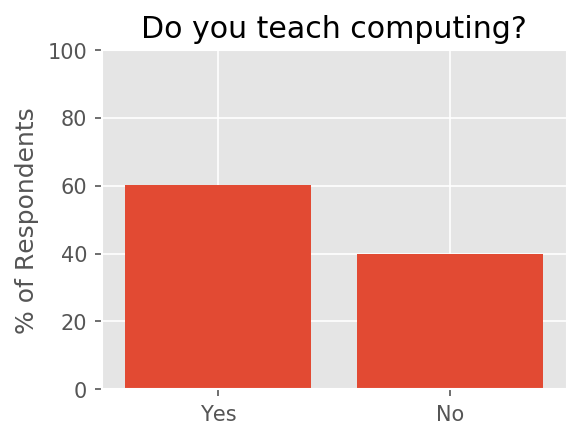

In [8]:
isY = lambda x:int(x==1)
countComputing = lambda row: isY(row.Q1)

teachComp = df.apply(countComputing,axis=1).sum()/df.shape[0]*100

plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
plt.bar([0,1],[teachComp,100-teachComp])
plt.ylabel('% of Respondents')
plt.xticks([0,1],['Yes','No'])
plt.axis([-.5,1.5,0,100])
plt.title('Do you teach computing?')

In [9]:
byDegree = df.groupby(['Phy.Degfact','Q1']).count()

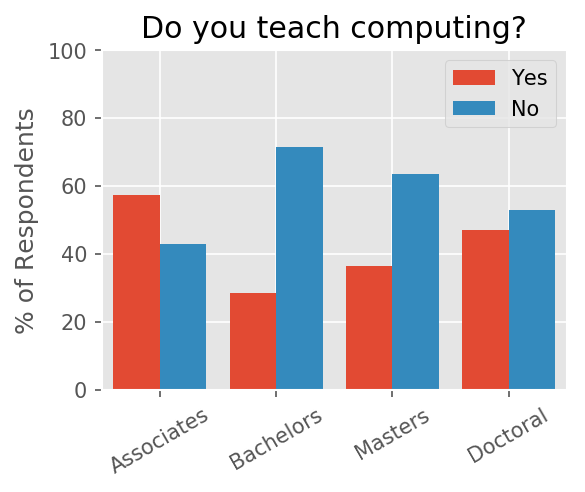

In [10]:
teachCompByDegree = [byDegree['id'][0]/(byDegree['id'][0]+byDegree['id'][1])*100,
                    byDegree['id'][2]/(byDegree['id'][2]+byDegree['id'][3])*100,
                    byDegree['id'][4]/(byDegree['id'][4]+byDegree['id'][5])*100,
                    byDegree['id'][6]/(byDegree['id'][6]+byDegree['id'][7])*100]
NotteachCompByDegree = [byDegree['id'][1]/(byDegree['id'][0]+byDegree['id'][1])*100,
                    byDegree['id'][3]/(byDegree['id'][2]+byDegree['id'][3])*100,
                    byDegree['id'][5]/(byDegree['id'][4]+byDegree['id'][5])*100,
                    byDegree['id'][7]/(byDegree['id'][6]+byDegree['id'][7])*100]
plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')\


plt.bar(np.arange(0.1,8,2),teachCompByDegree)
plt.bar(np.arange(0.9,8,2),NotteachCompByDegree)
plt.ylabel('% of Respondents')
plt.xticks(np.arange(0.5,8,2),['Associates','Bachelors','Masters','Doctoral'],rotation=30)
plt.axis([-.5,7.5,0,100])
plt.title('Do you teach computing?')
plt.legend(['Yes','No'])

In [11]:
byName = df.groupby(['NAME','Q1']).count()

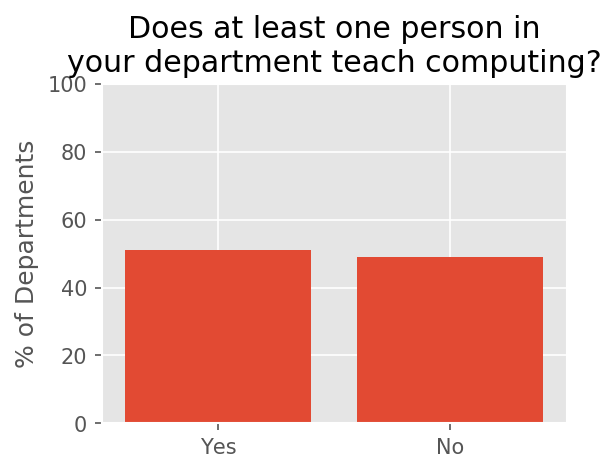

In [198]:
countsByName = byName['id'];
atLeastOne = countsByName[countsByName > 1].shape[0]/countsByName.shape[0]*100

plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
plt.bar([0,1],[atLeastOne,100-atLeastOne])
plt.ylabel('% of Departments')
plt.xticks([0,1],['Yes','No'])
plt.axis([-.5,1.5,0,100])
plt.title('Does at least one person in\nyour department teach computing?')

In [16]:
byNameAndDegree = df.groupby(['NAME','Phy.Degfact','Q1']).count()

In [27]:
numberOfFaculty = df.groupby(['NAME']).Q1.sum()
numberOfRespondents = df.groupby(['NAME']).Q1.size()
fractionOfFaculty = numberOfFaculty/numberOfRespondents
fractionOfFaculty = fractionOfFaculty.reset_index()

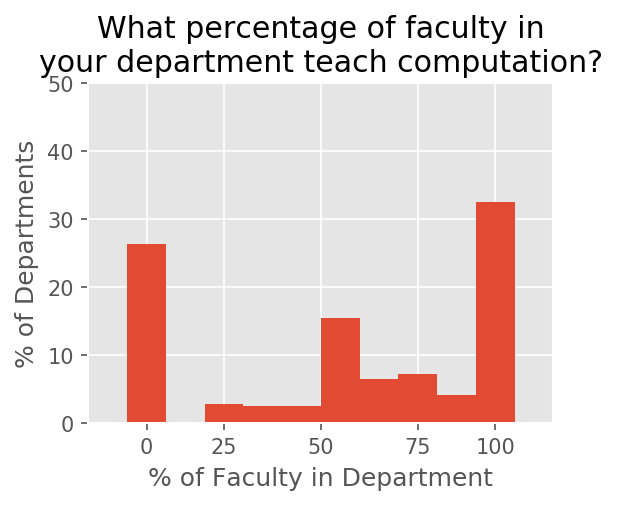

In [197]:
plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')

weights = np.ones_like(fractionOfFaculty.Q1)/float(len(fractionOfFaculty.Q1))*100

n, bins, patches = plt.hist(fractionOfFaculty.Q1,10,weights=weights)

plt.axis([-.1,1.1,0,50])
plt.ylabel('% of Departments')
plt.xlabel('% of Faculty in Department')
plt.title("What percentage of faculty in\nyour department teach computation?")
plt.xticks([0.05,0.25,0.5,0.75,0.95],[0,25,50,75,100]);

In [86]:
numberOfFacultyGrouped=df.groupby(['Phy.Degfact','NAME']).Q1.sum()
numberOfRespondentsGrouped=df.groupby(['Phy.Degfact','NAME']).Q1.size()
fractionOfFacultyGrouped = numberOfFacultyGrouped/numberOfRespondentsGrouped
fractionOfFacultyGrouped = fractionOfFacultyGrouped.reset_index()

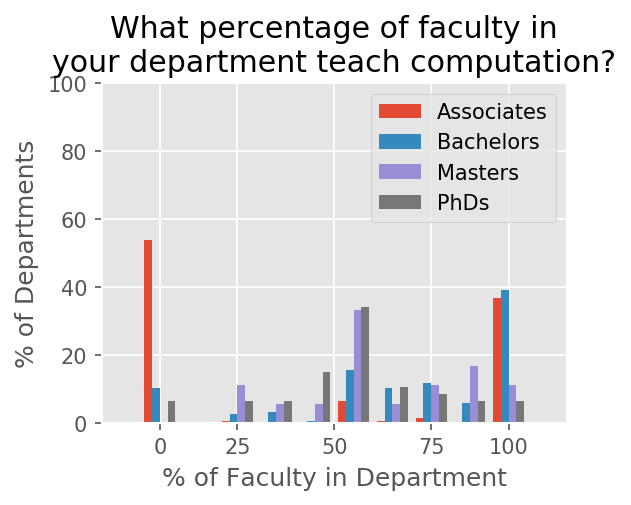

In [196]:
Assocs = fractionOfFacultyGrouped.loc[fractionOfFacultyGrouped['Phy.Degfact'] == "Associates"]
Bachelors = fractionOfFacultyGrouped.loc[fractionOfFacultyGrouped['Phy.Degfact'] == "Bachelors"]
Masters = fractionOfFacultyGrouped.loc[fractionOfFacultyGrouped['Phy.Degfact'] == "Masters"]
PhDs = fractionOfFacultyGrouped.loc[fractionOfFacultyGrouped['Phy.Degfact'] == "Phd"]

weights1 = np.ones_like(Assocs.Q1)/float(len(Assocs.Q1))*100
weights2 = np.ones_like(Bachelors.Q1)/float(len(Bachelors.Q1))*100
weights3 = np.ones_like(Masters.Q1)/float(len(Masters.Q1))*100
weights4 = np.ones_like(PhDs.Q1)/float(len(PhDs.Q1))*100

plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
plt.hist([Assocs.Q1,Bachelors.Q1,Masters.Q1,PhDs.Q1],10,weights=[weights1,weights2,weights3,weights4])
plt.axis([-.1,1.1,0,100])
plt.ylabel('% of Departments')
plt.xlabel('% of Faculty in Department')
plt.title("What percentage of faculty in\nyour department teach computation?")
plt.xticks([0.05,0.25,0.5,0.75,0.95],[0,25,50,75,100]);
plt.legend(['Associates','Bachelors','Masters','PhDs'])

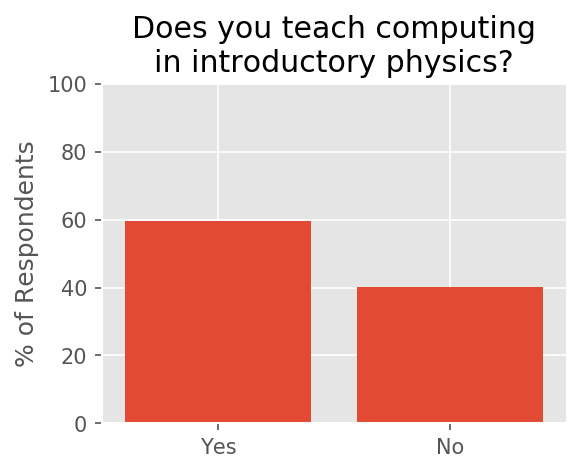

In [194]:
intYes = df.loc[df['Q8'] == 1].shape[0]
intTot = df.loc[df['Q8'] == 1].shape[0]+df.loc[df['Q8'] == 0].shape[0]
percentInt = intYes/intTot*100

plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
plt.bar([0,1],[percentInt,100-percentInt])
plt.ylabel('% of Respondents')
plt.xticks([0,1],['Yes','No'])
plt.axis([-.5,1.5,0,100])
plt.title('Does you teach computing\nin introductory physics?')

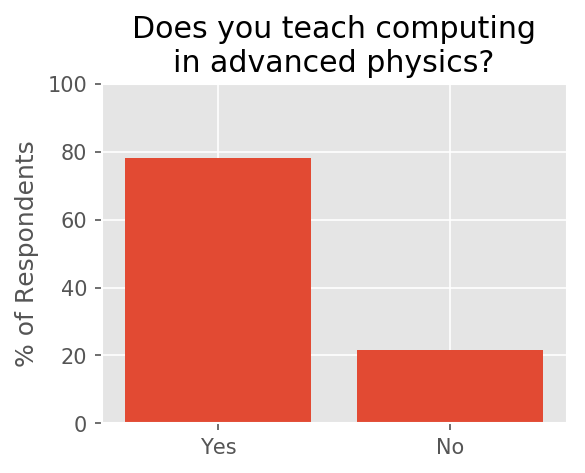

In [195]:
advYes = df.loc[df['Q11'] == 1].shape[0]
advTot = df.loc[df['Q11'] == 1].shape[0]+df.loc[df['Q11'] == 0].shape[0]
percentAdv = advYes/advTot*100

plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
plt.bar([0,1],[percentAdv,100-percentAdv])
plt.ylabel('% of Respondents')
plt.xticks([0,1],['Yes','No'])
plt.axis([-.5,1.5,0,100])
plt.title('Does you teach computing\nin advanced physics?')

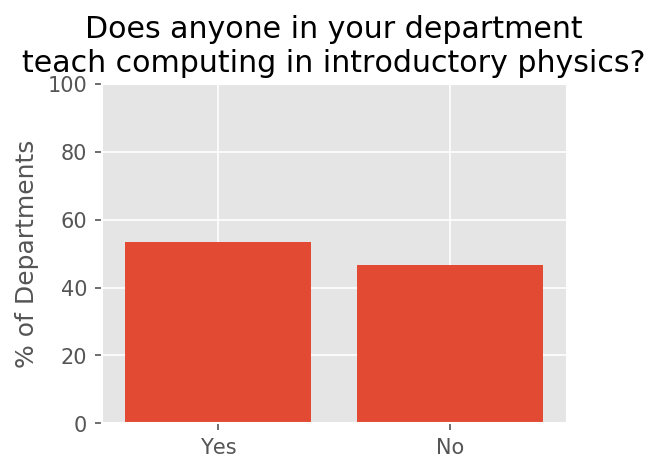

In [193]:
count0 = 0
count1 = 0

countedSchools = []

for index, row in df.iterrows():
    
    if(row['Q8']==1):
        count1 += 1
        countedSchools.append(row['NAME'])
    if(row['Q8'] == 0):
        count0 += 1

introSchools = len(set(countedSchools))
totalSchools = len(set(df['NAME']))
percentIntroSchools = introSchools/totalSchools*100
                   
plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
plt.bar([0,1],[percentIntroSchools,100-percentIntroSchools])
plt.ylabel('% of Departments')
plt.xticks([0,1],['Yes','No'])
plt.axis([-.5,1.5,0,100])
plt.title('Does anyone in your department\nteach computing in introductory physics?')

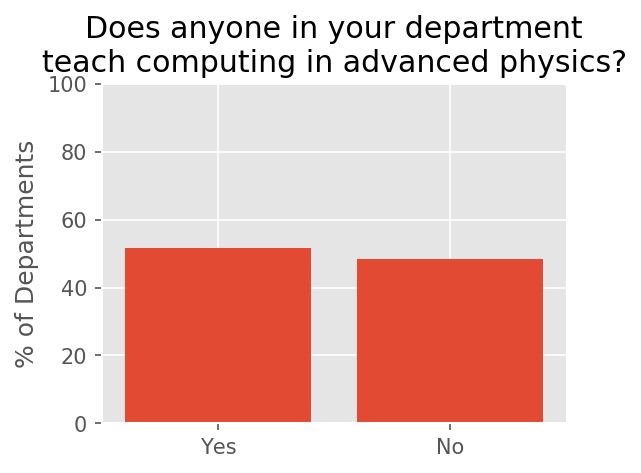

In [192]:
count0 = 0
count1 = 0

countedSchools = []

for index, row in df.iterrows():
    
    if(row['Q11']==1):
        count1 += 1
        countedSchools.append(row['NAME'])
    if(row['Q11'] == 0):
        count0 += 1

advSchools = len(set(countedSchools))
totalSchools = len(set(df['NAME']))
percentAdvSchools = advSchools/totalSchools*100
                   
plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
plt.bar([0,1],[percentAdvSchools,100-percentAdvSchools])
plt.ylabel('% of Departments')
plt.xticks([0,1],['Yes','No'])
plt.axis([-.5,1.5,0,100])
plt.title('Does anyone in your department\nteach computing in advanced physics?')

In [251]:
def countUniqueDepartmentResponse(df,question,level):
    
    count0 = 0
    count1 = 0
    counted = []

    for index, row in df.iterrows():
    
        if(row[question] == 1 and row['Phy.Degfact'] == level):
            count1 += 1
            counted.append(row['NAME'])
        if(row[question] == 0 and row['Phy.Degfact'] == level):
            count0 += 1

    uniqueYes = len(set(counted))
    total = df['NAME'].groupby(df['Phy.Degfact']==level).unique()[1].size
    percentYes = uniqueYes/total*100
    percentNo = 100-percentYes
    
    return percentYes,percentNo

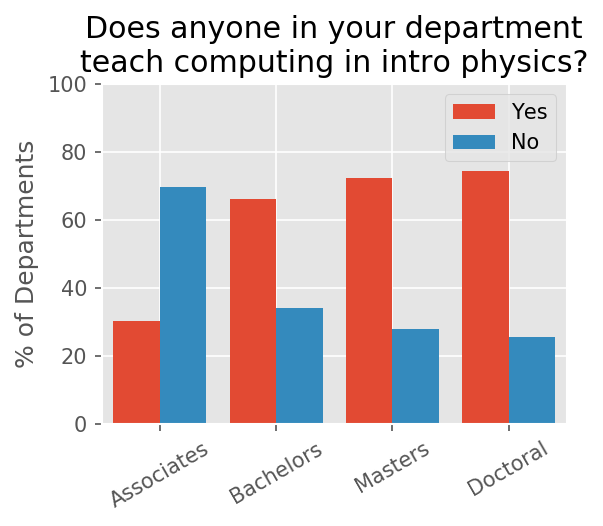

In [253]:
questionNo='Q8'
percentYes1,percentNo1 = countUniqueDepartmentResponse(df,questionNo,'Associates')
percentYes2,percentNo2 = countUniqueDepartmentResponse(df,questionNo,'Bachelors')
percentYes3,percentNo3 = countUniqueDepartmentResponse(df,questionNo,'Masters')
percentYes4,percentNo4 = countUniqueDepartmentResponse(df,questionNo,'Phd')
            
teachIntro = [percentYes1,percentYes2,percentYes3,percentYes4]
dontTeachIntro = [percentNo1,percentNo2,percentNo3,percentNo4]

plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
plt.bar(np.arange(0.1,8,2),teachIntro)
plt.bar(np.arange(0.9,8,2),dontTeachIntro)
plt.ylabel('% of Departments')
plt.xticks(np.arange(0.5,8,2),['Associates','Bachelors','Masters','Doctoral'],rotation=30)
plt.axis([-.5,7.5,0,100])
plt.legend(['Yes','No'])
plt.title('Does anyone in your department\nteach computing in intro physics?')

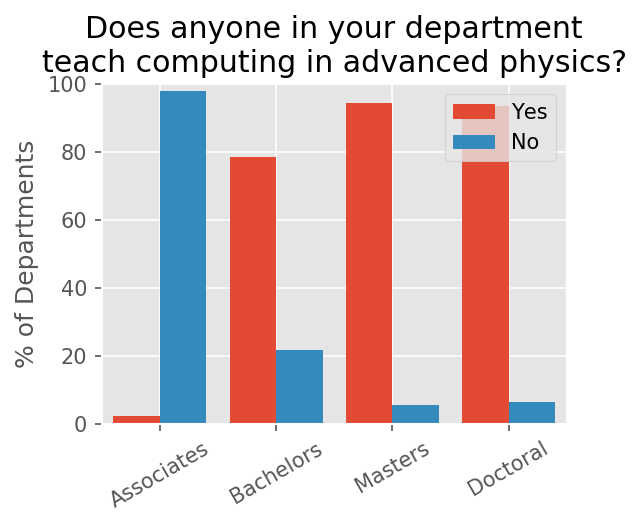

In [254]:
questionNo='Q11'
percentYes1,percentNo1 = countUniqueDepartmentResponse(df,questionNo,'Associates')
percentYes2,percentNo2 = countUniqueDepartmentResponse(df,questionNo,'Bachelors')
percentYes3,percentNo3 = countUniqueDepartmentResponse(df,questionNo,'Masters')
percentYes4,percentNo4 = countUniqueDepartmentResponse(df,questionNo,'Phd')
            
teachIntro = [percentYes1,percentYes2,percentYes3,percentYes4]
dontTeachIntro = [percentNo1,percentNo2,percentNo3,percentNo4]

plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
plt.bar(np.arange(0.1,8,2),teachIntro)
plt.bar(np.arange(0.9,8,2),dontTeachIntro)
plt.ylabel('% of Departments')
plt.xticks(np.arange(0.5,8,2),['Associates','Bachelors','Masters','Doctoral'],rotation=30)
plt.axis([-.5,7.5,0,100])
plt.legend(['Yes','No'])
plt.title('Does anyone in your department\nteach computing in advanced physics?')

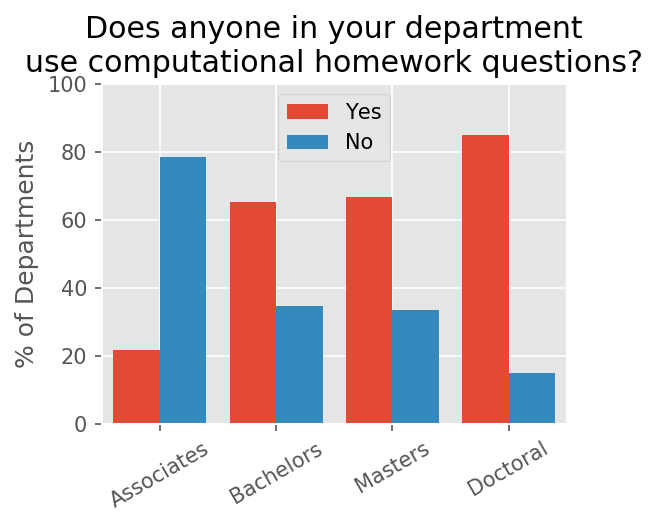

In [255]:
questionNo='Q32'
percentYes1,percentNo1 = countUniqueDepartmentResponse(df,questionNo,'Associates')
percentYes2,percentNo2 = countUniqueDepartmentResponse(df,questionNo,'Bachelors')
percentYes3,percentNo3 = countUniqueDepartmentResponse(df,questionNo,'Masters')
percentYes4,percentNo4 = countUniqueDepartmentResponse(df,questionNo,'Phd')
            
teachIntro = [percentYes1,percentYes2,percentYes3,percentYes4]
dontTeachIntro = [percentNo1,percentNo2,percentNo3,percentNo4]

plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
plt.bar(np.arange(0.1,8,2),teachIntro)
plt.bar(np.arange(0.9,8,2),dontTeachIntro)
plt.ylabel('% of Departments')
plt.xticks(np.arange(0.5,8,2),['Associates','Bachelors','Masters','Doctoral'],rotation=30)
plt.axis([-.5,7.5,0,100])
plt.legend(['Yes','No'])
plt.title('Does anyone in your department\nuse computational homework questions?')

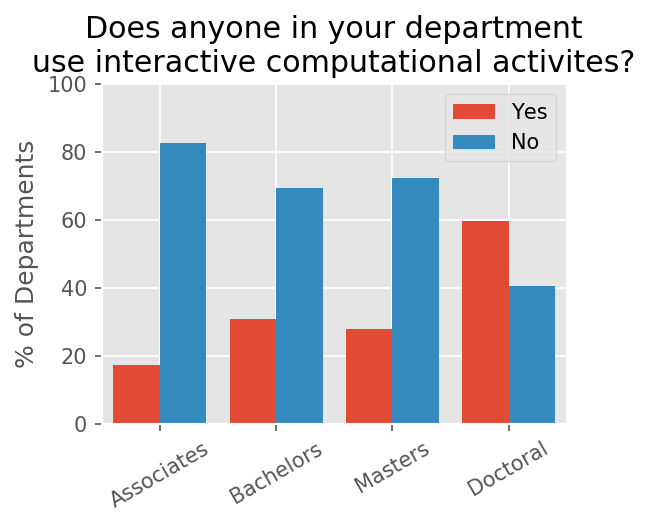

In [256]:
questionNo='Q33'
percentYes1,percentNo1 = countUniqueDepartmentResponse(df,questionNo,'Associates')
percentYes2,percentNo2 = countUniqueDepartmentResponse(df,questionNo,'Bachelors')
percentYes3,percentNo3 = countUniqueDepartmentResponse(df,questionNo,'Masters')
percentYes4,percentNo4 = countUniqueDepartmentResponse(df,questionNo,'Phd')
            
teachIntro = [percentYes1,percentYes2,percentYes3,percentYes4]
dontTeachIntro = [percentNo1,percentNo2,percentNo3,percentNo4]

plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
plt.bar(np.arange(0.1,8,2),teachIntro)
plt.bar(np.arange(0.9,8,2),dontTeachIntro)
plt.ylabel('% of Departments')
plt.xticks(np.arange(0.5,8,2),['Associates','Bachelors','Masters','Doctoral'],rotation=30)
plt.axis([-.5,7.5,0,100])
plt.legend(['Yes','No'])
plt.title('Does anyone in your department\nuse interactive computational activites?')

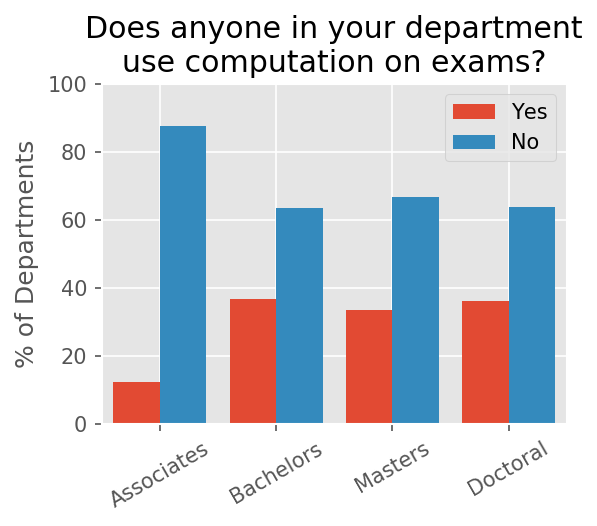

In [257]:
questionNo='Q34'
percentYes1,percentNo1 = countUniqueDepartmentResponse(df,questionNo,'Associates')
percentYes2,percentNo2 = countUniqueDepartmentResponse(df,questionNo,'Bachelors')
percentYes3,percentNo3 = countUniqueDepartmentResponse(df,questionNo,'Masters')
percentYes4,percentNo4 = countUniqueDepartmentResponse(df,questionNo,'Phd')
            
teachIntro = [percentYes1,percentYes2,percentYes3,percentYes4]
dontTeachIntro = [percentNo1,percentNo2,percentNo3,percentNo4]

plt.figure(num=None, figsize=(4, 3), dpi=150, facecolor='w', edgecolor='k')
plt.bar(np.arange(0.1,8,2),teachIntro)
plt.bar(np.arange(0.9,8,2),dontTeachIntro)
plt.ylabel('% of Departments')
plt.xticks(np.arange(0.5,8,2),['Associates','Bachelors','Masters','Doctoral'],rotation=30)
plt.axis([-.5,7.5,0,100])
plt.legend(['Yes','No'])
plt.title('Does anyone in your department\nuse computation on exams?')